# Homework Week 4

## Question 7.1
Describe a situation or problem from your job, everyday life, current events, etc., for which exponential smoothing would be appropriate. What data would you need? Would you expect the value of $\alpha$ (the first smoothing parameter) to be closer to 0 or 1, and why?

The operator of a solar power plant could measure the power output of solar modules from different vendors to compare the degrading process.
Since the solar altitude is cyclic, the model would include a cycle component and the trend would help to show the degradation.
The degradation is expected to be a slow process, so I'd expect the value of $\alpha$ to be closer to 1 than to 0.

## Question 7.2
Using the 20 years of daily high temperature data for Atlanta (July through October) from Question 6.2 (file temps.txt), build and use an exponential smoothing model to help make a judgment of whether the unofficial end of summer has gotten later over the 20 years. (Part of the point of this assignment is for you to think about how you might use exponential smoothing to answer this question. Feel free to combine it with other models if you’d like to. There’s certainly more than one reasonable approach.)

Importing the dataset:

In [2]:
data <- read.table("temps.txt", stringsAsFactors=FALSE, header=TRUE)

In [3]:
head(data)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,⋯,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,⋯,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,⋯,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,⋯,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,⋯,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,⋯,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,⋯,81,87,82,87,89,90,98,83,87,84


Generating a vector with all temperatures and feeding it into a time series object. The start is the year 1996 and the frequency is the number of records for each year.

In [6]:
temps_vec <- as.vector(unlist(data[,2:21]))
temps <- ts(temps_vec,
            start=1996,
            frequency=123)

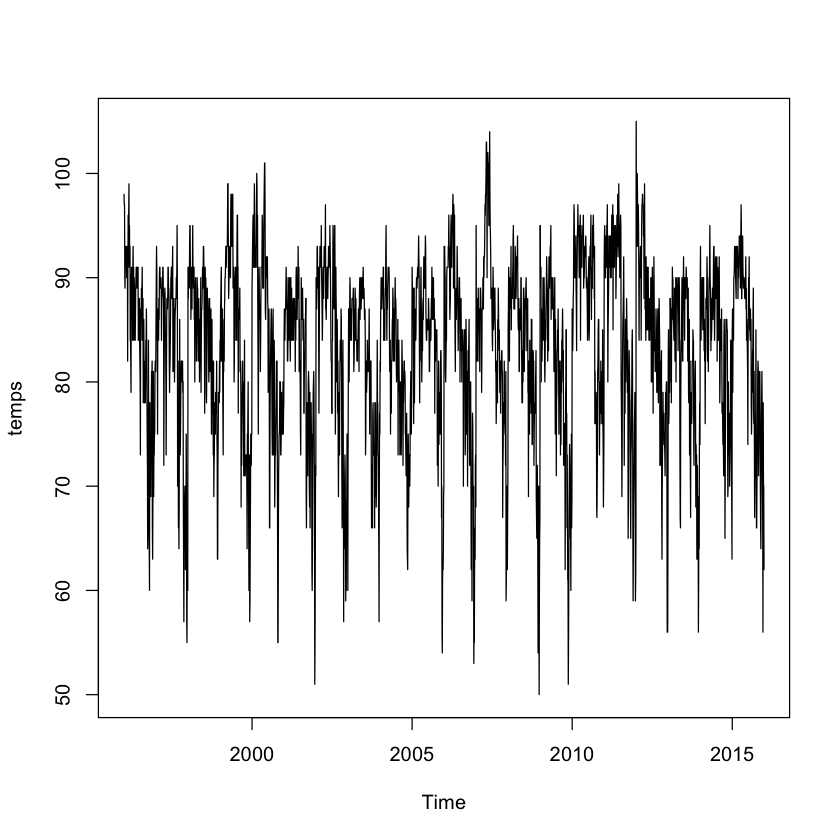

In [30]:
plot(temps)

Using the HoltWinters function only with exponential smoothing:

In [63]:
model <- HoltWinters(temps,
                     alpha=NULL,
                     beta=FALSE,
                     gamma=FALSE)

In [64]:
model

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = temps, alpha = NULL, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.8388021
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 63.30952

If we pass alpha=NULL the algorithm optimises for a low squared error:

In [65]:
model$SSE

[1] 56198.1

Using the HoltWinters function with a trend and seasonal model:

In [69]:
model <- HoltWinters(temps,
                     alpha=NULL,
                     beta=NULL,
                     gamma=NULL,
                     seasonal="multiplicative")

In [72]:
model$SSE

[1] 68904.57

The new model results in a higher squared error. The comparison with an additive seasonal model shows a marginal lower error:

In [74]:
model <- HoltWinters(temps,
                     alpha=NULL,
                     beta=NULL,
                     gamma=NULL,
                     seasonal="additive")
model$SSE

[1] 66244.25

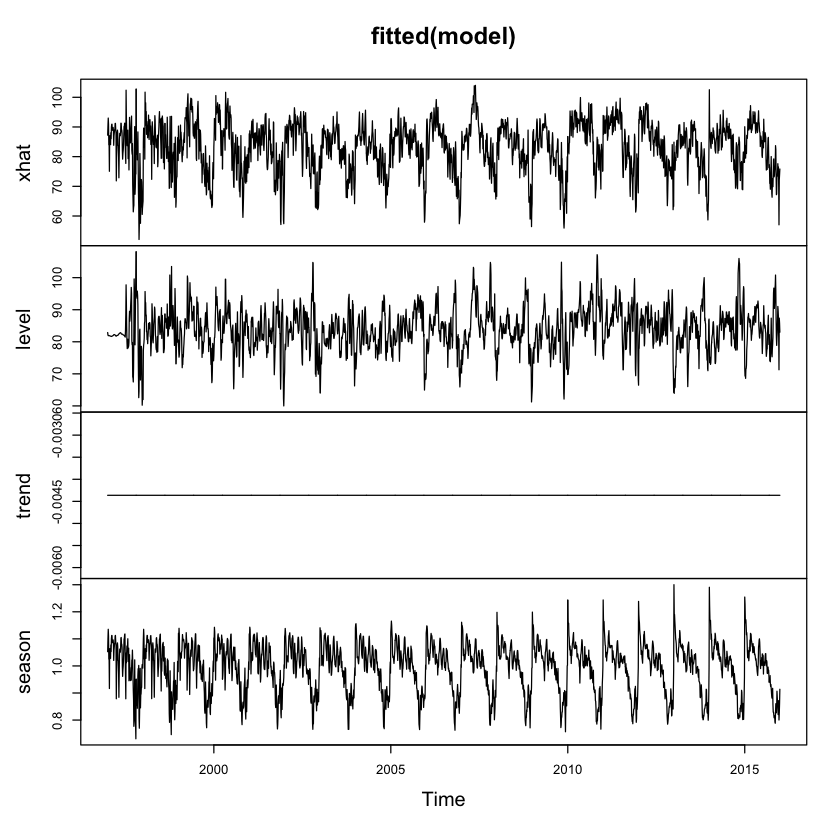

In [71]:
plot(fitted(model))

Plotting the model components shows no detectable trend in the data, but we can analyse the seasonal component with a CUMSUM approach. This should result in less noise compared to utilization of the temperature for the CUMSUM model.

Export the seasonal component:

In [43]:
seasonal <- model$fitted[,4]
write.csv2(matrix(seasonal, nrow=123), file='seasonal.csv')

Doing CUMSUM in Excel (see the attached excel file for details). Using the average and standard deviation for July as basis and appling CUMSUM for each year results in the following graph.
I started with the parameters $$ C = \frac{1}{2} * \sigma$$ $$ T = 5 * \sigma$$ and adjusted them manually. The data does not show that the unofficial end of summer has gotten later over the 20 years in the dataset.

![CUMSUM Chart](cumsum.png)